In [1]:
import pandas as pd
import xarray as xr
import requests
import matplotlib.pyplot as plt

## Section 1: Storm Reports ##

In [2]:
#Generates link to csv download of wind report on given date. Date format "yymmdd"
def generate_link(date):
    return f'https://www.spc.noaa.gov/climo/reports/{date}_rpts_wind.csv'

In [3]:
#Gets wind report on given date as a pandas dataframe
def get_wind_report(date):
    df = request_wind_report_df(date)    
    df = add_datetime(df, date)
    return df

def request_wind_report_df(date):
    #Actual request
    link = generate_link(date)
    data = requests.get(link)
    #Turns csv string into dataFrame
    csv_string = data.text
    data = [row.split(',') for row in csv_string.split('\n')]
    data.pop(-1)
    columns = data.pop(0)
    data.pop(0)
    #Returns dataframe 
    df = pd.DataFrame(data, columns=columns)
    df["Lat"] = df["Lat"].astype("float")
    df["Lon"] = df["Lon"].astype("float")
    return df

def add_datetime(df, date):
    #Hardcoded
    day = date[4] + date[5]
    time = df["Time"]
    datetime = f'2023-05-{day}'
    #Adds date time with correct string format
    df["datetime"] = [pd.Timestamp(f'{datetime} {t}') for t in time]
    df['datetime'] = pd.to_datetime(df["datetime"])
    #Removes Time column
    df.drop(columns=["Time"], inplace=True)
    return df 

In [4]:
get_wind_report("230531")

,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,60,Tunerville,Deuel,SD,44.89,-96.68,Mesonet station 291 4N Altamont (SDDOT). (ABR),2023-05-31 18:51:00
1,UNK,1 N Yorkville,Kendall,IL,41.65,-88.45,Pictures of large tree limbs downed at multipl...,2023-05-31 20:07:00
2,60,3 SW Dalhart,Hartley,TX,36.02,-102.55,(AMA),2023-05-31 20:16:00
3,61,8.9 WNW St. Charles,Kane,IL,41.96,-88.47,Also approx 0.5 inch hail. (LOT),2023-05-31 20:45:00
4,77,11 NNW Slash Ranch,Loving,TX,31.98,-103.67,Mesonet station FW9691 Mentone. (MAF),2023-05-31 21:00:00
5,60,3 SE Dumas,Moore,TX,35.83,-101.92,(AMA),2023-05-31 21:16:00
6,59,9 NNE Sunray,Sherman,TX,36.14,-101.78,(AMA),2023-05-31 21:17:00
7,65,19 WNW Jal,Lea,NM,32.19,-103.51,Mesonet station FW9690 Jal. (MAF),2023-05-31 21:30:00
8,58,2 E Goodwell,Texas,OK,36.60,-101.60,(AMA),2023-05-31 21:55:00
9,61,3 NW Fruitvale,Mesa,CO,39.12,-108.52,ASOS station KGJT Grand Junction Rgnl AP. (GJT),2023-05-31 21:55:00


In [7]:
#TODO: Brain storm how to plot close times together

In [5]:
#Returns pandas dataframe with wind reports for month of may
def get_may_weather_reports():    
    i = 0
    for date in generate_dates():
        df = get_wind_report(date)
        if i == 0:
            big_df = df
            i += 1
        else :
            big_df = pd.concat([big_df, df])
    big_df.reset_index(inplace=True)
    return big_df

#Generates dates in format "yymmdd"
def generate_dates():
    dates = []
    for i in range(8, 32):
        dates.append("2305" + (f"{i}" if i >9 else f'0{i}'))
    return dates

In [6]:
report_data = get_may_weather_reports()
report_data

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,0,UNK,4 NNW BEVIL OAKS,HARDIN,TX,30.22,-94.29,HARDIN 911 REPORTS POSSIBLE TORNADO TOUCHED DO...,2023-05-08 20:10:00
1,1,UNK,3 WNW LUMBERTON,HARDIN,TX,30.27,-94.25,NUMEROUS POWER OUTAGES REPORTED IN AND AROUND ...,2023-05-08 20:25:00
2,2,UNK,3 NW LEWISTON,NEZ PERCE,ID,46.42,-117.03,DELAYED REPORT FROM MAY 8TH. GUSTY WINDS FROM ...,2023-05-08 20:30:00
3,3,UNK,4 NW BEAUMONT,JEFFERSON,TX,30.14,-94.18,SOFTWOOD TREE SPLIT IN HALF. (LCH),2023-05-08 20:42:00
4,4,59,3 NNW BRIDGE CITY,ORANGE,TX,30.08,-93.87,MESONET REPORTS THUNDERSTORM WIND GUST OF 59 M...,2023-05-08 21:19:00
...,...,...,...,...,...,...,...,...,...
950,29,58,4 E Vega,Oldham,TX,35.24,-102.35,Observed by WT Mesonet. (AMA),2023-05-31 00:50:00
951,30,63,3 NNE Umbarger,Randall,TX,34.99,-102.08,Observed at WT Mesonet. (AMA),2023-05-31 01:20:00
952,31,58,10 ESE Valley de Oro,Potter,TX,35.42,-101.93,Observed at WT Mesonet. (AMA),2023-05-31 01:54:00
953,32,60,1 WNW Fritch,Hutchinson,TX,35.65,-101.61,Corrects previous tstm wnd gst report from 2 W...,2023-05-31 02:23:00


In [7]:
interesting_events = report_data[report_data["Lat"] == 34.82]
interesting_events
# interesting_events["Lon"].to_numpy()

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
799,11,UNK,GRADY,CURRY,NM,34.82,-103.32,NORTHSIDE WINDOWS OF BAPTIST CHURCH KNOCKED OU...,2023-05-24 01:10:00
800,12,92,GRADY,CURRY,NM,34.82,-103.31,TORUS MOBILE MESONET CLOCKED 92.4 MPH FROM RFD...,2023-05-24 01:13:00


In [8]:
report_data["Lat"]
report_data["Lon"]

0      -94.29
1      -94.25
2     -117.03
3      -94.18
4      -93.87
        ...  
950   -102.35
951   -102.08
952   -101.93
953   -101.61
954   -101.62
Name: Lon, Length: 955, dtype: float64

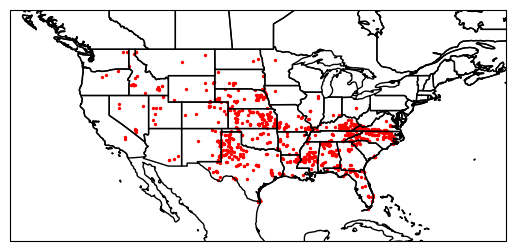

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
figure = plt.figure()

ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.set_extent(
    [-135, -60, 20, 55],
    crs=ccrs.PlateCarree()
)
plt.scatter(
    x = report_data["Lon"],
    y = report_data["Lat"],
    color="red",
    s=2,
    alpha=1,
    transform=ccrs.PlateCarree()
)



plt.show()

## TODO: Map the "interesting" weather reports ##

In [11]:
interesting_event_1 = report_data[report_data["Lat"] == 33.62]
interesting_event_1

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
785,28,68,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. (OUN),2023-05-23 04:10:00
786,29,76,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. CORRECTED FOR EARLIER TIME...,2023-05-23 04:15:00
787,30,76,3 NW SEYMOUR,BAYLOR,TX,33.62,-99.3,WEST TEXAS MESONET. (OUN),2023-05-23 04:20:00


In [12]:
intersting_event_2 = report_data[report_data["Lat"] == 33.17]
intersting_event_2

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
87,17,UNK,SYLACAUGA,TALLADEGA,AL,33.17,-86.25,MULTIPLE REPORTS OF TREES AND POWER LINES DOWN...,2023-05-09 18:55:00
337,48,65,1 NW HASKELL,HASKELL,TX,33.17,-99.74,WEST TEXAS MESONET IN HASKELL REPORTED A MAX G...,2023-05-12 23:44:00
692,1,UNK,7 N CADDO MILLS,HUNT,TX,33.17,-96.21,POWERLINES AND POWER POLES SNAPPED; SOME MATUR...,2023-05-19 21:27:00
755,11,80,3 NE ASPERMONT,STONEWALL,TX,33.17,-100.20,WEST TEXAS MESONET. SEVERE WIND GUSTS CONTINUE...,2023-05-22 01:24:00


In [13]:
interesting_event_3 = report_data[report_data["Lat"] == 36.77]
interesting_event_3

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
722,2,93,10 NW MERCURY,NYE,NV,36.77,-116.1,AT 1700 PDT... THE ARL SORD SENSOR LOCATED AT ...,2023-05-20


In [14]:
i_event_4 = report_data[report_data["Lat"] == 32.99]
i_event_4

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
367,10,UNK,2 ESE HUGHES SPRINGS,CASS,TX,32.99,-94.60,TREES DOWN EAST OF HUGHES SPRINGS. (SHV),2023-05-13 00:50:00
824,36,59,6 WNW DENVER CITY,YOAKUM,TX,32.99,-102.94,WEST TEXAS MESONET. (LUB),2023-05-24 08:11:00
868,0,79,6 WNW DENVER CITY,YOAKUM,TX,32.99,-102.94,WEST TEXAS MESONET PEAK GUST. INITIAL SEVERE G...,2023-05-28 23:58:00


## Section 2: RRFS Model Data ##

In [26]:
from RRFS import rrfs
# print(dir(RRFS))
#Inputs storm_report row and the forecast hour
#Outputs xarray dataset with model forecast
def fetch_rffs_forecast(storm_report, forecast_hour):
    st_month = storm_report["datetime"].month
    st_year = storm_report["datetime"].year
    st_day = storm_report["datetime"].day
    st_hour = storm_report["datetime"].hour
    
    date_time= f'{st_year}-{st_month}-{st_day}'
    initialization_hour = get_initialization_hour(storm_report, forecast_hour)
    
    return rffs.fetch_file(date_time, initialization_hour, forecast_hour)

#Gets initialization hour for 
def get_initialization_hour(storm_report, forecast_hour):
    hour = storm_report["datetime"].hour
    init_hour = (hour - forecast_hour)%24
    initialization_hour = f'0{init_hour}' if init_hour < 10 else f'{init_hour}'
    return initialization_hour


In [32]:
# from RRFS import rrfs
# r = rrfs.rrfs()
# ds = r.fetch_file('2023-05-24', 19, 6)
# ds
ds = xr.open_dataset("./donwload_test_rrfs.t00z.natlev.f001.conus_3km.grib2", engine='pynio')

In [33]:
ds

<xarray.Dataset>
Dimensions:                        (ygrid_0: 1059, xgrid_0: 1799, lv_ISBL0: 5,
                                    lv_AMSL1: 10, lv_HYBL2: 65, lv_SPDL3: 6,
                                    lv_ISBL4: 4, lv_HTGL5: 2, lv_SIGL6: 22,
                                    lv_SPDL7: 3, lv_HTGL8: 2, lv_DBLL9: 9,
                                    lv_HTGL10: 2, lv_HTGL11: 2, lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                      (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                       (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                       (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                       (lv_ISBL4) float32 2.5e+04 5e+04 ... 8.5e+04
  * lv_HYBL2                       (lv_HYBL2) float32 1.0 2.0 3.0 ... 64.0 65.0
  * lv_AMSL1                       (lv_AMSL1) float32 305.0 457.0 ... 4.572e+03
  * lv_ISBL0                       (lv_ISBL0) float32 2.5e+04 5e+04 ... 9.5e+04
    gridlat_0                      (ygrid_0, xgrid_0) float32 ...
    gridlon_0                      (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/215)
    TMP_P0_L1_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0               (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0               (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0               (ygrid_0, xgrid_0) float32 ...
    ...                             ...
    lv_HTGL8_l0                    (lv_HTGL8) float32 ...
    lv_SPDL7_l1                    (lv_SPDL7) float32 ...
    lv_SPDL7_l0                    (lv_SPDL7) float32 ...
    lv_SPDL3_l1                    (lv_SPDL3) float32 ...
    lv_SPDL3_l0                    (lv_SPDL3) float32 ...
    gridrot_0                      (ygrid_0, xgrid_0) float32 ...

In [62]:
ds['xgrid_0']

<xarray.DataArray 'xgrid_0' (xgrid_0: 1799)>
array([   0,    1,    2, ..., 1796, 1797, 1798])
Dimensions without coordinates: xgrid_0

In [76]:
#TODO: Figure out how to subset the data

#Inputs ds, lat lom
#Output ds bounded by 5x5 lat, lon centered on lat lon
def foo(lat, lon, model_output, w, h):
    #Get bounds for box centered on lat, lon
    #Subset xarray dataset to contain things inside the bound
    return

def get_bounding_box(lat, lon, w, h):
    lat_max = lat + h
    lat_min = lat - h
    lon_max = lon + w
    lon_min = lon - w
    return lat_max, lat_min, lon_max, lon_min

In [77]:
get_bounding_box(34, -103, 3, 3)

(37, 31, -100, -106)

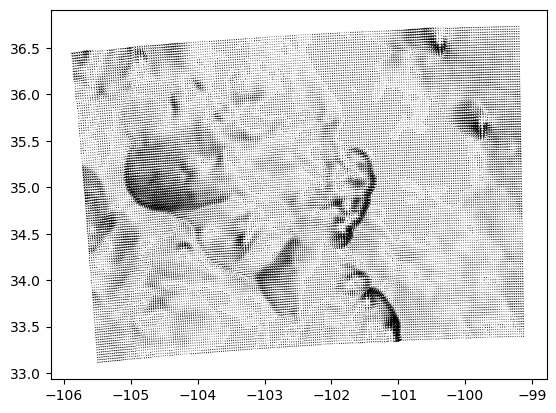

In [14]:
step = 12
l = 650
offset = 200
y = 340
o = 125
X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

In [91]:
# import matplotlib.pyplot as plt
# import numpy as np

# step = 5
# X = ds.coords['gridlon_0'][0:100:step, 0:100:step]
# Y = ds.coords['gridlat_0'][0:100:step, 0:100:step]
# U = ds.MAXUW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]
# V = ds.MAXVW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]

# normalized_U = (U - U.min())/(U.max() - U.min())
# normalized_V = (V - V.min())/(V.max() - V.min())
# fig, ax = plt.subplots()

# q = ax.quiver(X, Y, U, V)

# plt.show()

In [11]:
U - U.mean()

<xarray.DataArray 'MAXUW_P8_L103_GLC0_max1h' (ygrid_0: 20, xgrid_0: 20)>
array([[-1.4775    , -1.6025    , -1.415     , -1.415     , -1.165     ,
        -1.04      , -0.78999996, -0.78999996, -0.66499996, -0.91499996,
        -0.66499996, -0.60249996, -0.4775    , -0.3525    , -0.415     ,
        -0.415     ,  0.08500001, -0.10249999, -0.29      , -0.03999999],
       [-1.3525    , -1.2275    , -1.4775    , -1.04      , -0.53999996,
        -0.72749996, -0.53999996, -0.53999996, -0.72749996, -0.16499999,
        -0.78999996, -0.66499996, -0.60249996, -0.10249999, -0.3525    ,
        -0.66499996, -0.10249999, -0.16499999, -0.10249999,  0.02250001],
       [-1.4775    , -0.78999996, -1.04      , -0.415     , -0.72749996,
        -1.165     , -0.16499999, -0.10249999, -0.3525    ,  0.21000001,
        -0.10249999, -0.22749999, -0.22749999,  0.3975    ,  0.21000001,
         0.02250001, -0.10249999,  0.02250001, -0.16499999,  0.14750001],
       [-1.3525    , -0.60249996, -0.91499996, -1.1025    , -0.97749996,
        -1.165     , -0.415     , -0.53999996, -0.03999999, -0.4775    ,
         0.58500004,  0.08500001, -0.53999996,  0.52250004,  0.64750004,
        -0.97749996,  0.3975    ,  0.08500001,  0.46      ,  0.2725    ],
       [-0.97749996, -1.415     , -1.3525    , -1.1025    , -0.60249996,
        -0.85249996, -0.78999996, -0.53999996, -0.10249999, -0.85249996,
         0.2725    ,  0.46      ,  0.46      ,  0.52250004,  0.02250001,
         0.08500001, -0.53999996,  0.08500001,  0.14750001, -0.16499999],
...
         0.08500001, -0.10249999, -0.10249999, -0.29      ,  0.3975    ,
         0.52250004,  0.21000001,  0.14750001,  0.83500004,  1.085     ,
         0.52250004,  0.96000004,  1.21      ,  0.83500004,  0.52250004],
       [-0.10249999, -0.10249999, -0.29      , -0.03999999,  0.46      ,
         0.14750001, -0.22749999,  0.21000001,  0.46      ,  0.02250001,
         0.3975    ,  0.89750004,  0.46      ,  1.21      ,  0.58500004,
         0.335     ,  1.335     ,  0.52250004,  1.1475    ,  0.83500004],
       [-0.03999999,  0.08500001, -0.10249999,  0.64750004,  0.71000004,
         0.58500004,  0.08500001,  0.52250004,  0.71000004,  0.83500004,
         0.58500004,  0.89750004,  1.71      ,  1.2725    ,  0.58500004,
         0.58500004,  0.2725    ,  0.58500004,  0.21000001,  1.0225    ],
       [-0.97749996,  0.64750004,  0.08500001,  0.08500001,  0.08500001,
        -0.10249999,  0.335     ,  0.77250004,  0.71000004,  0.89750004,
         1.21      ,  1.085     ,  1.585     ,  1.2725    ,  1.085     ,
         0.71000004,  0.58500004,  0.83500004,  0.64750004,  1.0225    ],
       [-0.66499996, -0.16499999,  0.2725    ,  0.335     ,  0.52250004,
         0.3975    ,  0.46      ,  0.83500004,  1.1475    ,  0.46      ,
         0.89750004,  1.0225    ,  1.3975    ,  1.335     ,  1.21      ,
         1.21      ,  1.1475    ,  0.89750004,  1.1475    ,  1.1475    ]],
      dtype=float32)
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 ...
    gridlon_0  (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0

In [8]:
#Subsetting the region 


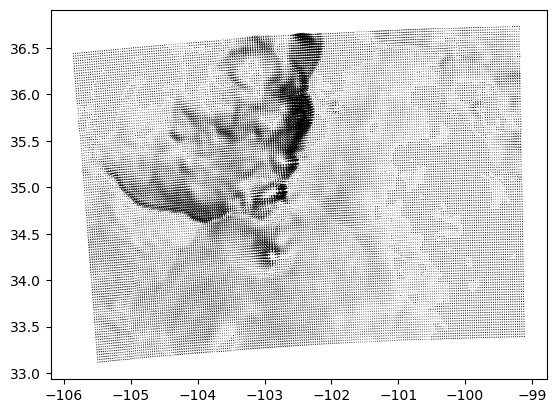

In [6]:
step = 12
l = 650
offset = 200
y = 340
o = 125
X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

In [31]:
# for i in ds.data_vars:
#     print(i,ds[i].attrs['long_name'])
#     print("")

In [211]:
def foo(ds, step, l, offset, y, o):
    X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
    Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
    U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
    V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]
    return X, Y, U, V

NameError: name 'cfeature' is not defined

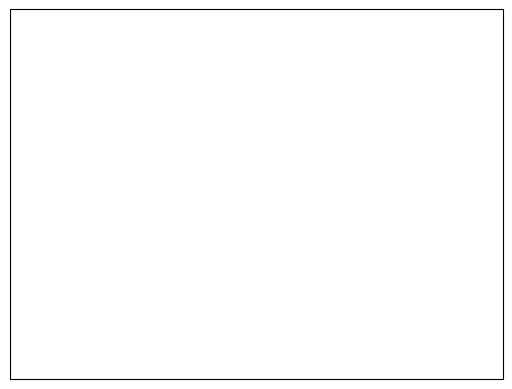

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-105, -101, 33, 36], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

step = 12
l = 650
offset = 200
y = 340

X, Y, U, V = foo(ds, step, l, offset, y, o)

q = ax.quiver(X, Y, U, V, transform=ccrs.PlateCarree())
x = interesting_events["Lon"].to_numpy().astype("float")
y = interesting_events["Lat"].to_numpy().astype("float")

plt.scatter(x=-103.32, y=34.82, color="red", s=4)
plt.show()


In [31]:


import boto3

import sys

from botocore import UNSIGNED

from botocore.client import Config

FILE_NAME	=	'./donwload_test_rrfs.t00z.natlev.f001.conus_3km.grib2'

BUCKET_NAME	=	'noaa-rrfs-pds'

OBJECT_NAME	=	'rrfs_a/rrfs_a.20230530/00/control/rrfs.t00z.natlev.f001.conus_3km.grib2'


s3 = boto3.client('s3', 

	region_name='us-east-1', 
    config=Config(signature_version=UNSIGNED)
	)

with open(FILE_NAME, 'wb') as f:
    s3.download_fileobj(BUCKET_NAME, OBJECT_NAME, f)

In [35]:
# import xarray as xr
ds = xr.open_dataset("./donwload_test_rrfs.t00z.natlev.f001.conus_3km.grib2", engine='pynio')
ds

<xarray.Dataset>
Dimensions:                        (ygrid_0: 1059, xgrid_0: 1799, lv_ISBL0: 5,
                                    lv_AMSL1: 10, lv_HYBL2: 65, lv_SPDL3: 6,
                                    lv_ISBL4: 4, lv_HTGL5: 2, lv_SIGL6: 22,
                                    lv_SPDL7: 3, lv_HTGL8: 2, lv_DBLL9: 9,
                                    lv_HTGL10: 2, lv_HTGL11: 2, lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                      (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                       (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                       (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                       (lv_ISBL4) float32 2.5e+04 5e+04 ... 8.5e+04
  * lv_HYBL2                       (lv_HYBL2) float32 1.0 2.0 3.0 ... 64.0 65.0
  * lv_AMSL1                       (lv_AMSL1) float32 305.0 457.0 ... 4.572e+03
  * lv_ISBL0                       (lv_ISBL0) float32 2.5e+04 5e+04 ... 9.5e+04
    gridlat_0                      (ygrid_0, xgrid_0) float32 ...
    gridlon_0                      (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/215)
    TMP_P0_L1_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                 (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0               (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0               (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0               (ygrid_0, xgrid_0) float32 ...
    ...                             ...
    lv_HTGL8_l0                    (lv_HTGL8) float32 ...
    lv_SPDL7_l1                    (lv_SPDL7) float32 ...
    lv_SPDL7_l0                    (lv_SPDL7) float32 ...
    lv_SPDL3_l1                    (lv_SPDL3) float32 ...
    lv_SPDL3_l0                    (lv_SPDL3) float32 ...
    gridrot_0                      (ygrid_0, xgrid_0) float32 ...

In [ ]:
# import boto3
from botocore import UNSIGNED
from botocore.client import Config

class s3:
    def __init__(self, bucket_name):
        self.bucket_name = bucket_name
        self.s3 = boto3.client(
            's3',
            region_name='us-east-1',
            config=Config(signature_version=UNSIGNED)
        )
    
    #Fetches file from bucket
    def fetch_file(self, date_time_string, init_hour_string, file_name):
        try :

            object_name = self.create_object_name(date_time_string, init_hour_string, file_name)
            #TODO: Check if this is the best way of 
            # with open(file_name, 'wb') as f:
            # f = open(file_name, 'w')
            with open("./test.grib",'w') as f:
                print("opened file")
                self.s3.download_fileobj(self.bucket_name, object_name, f)
            print(f"Successfully downloaded model output file {file_name}")
            
        except Exception as e:
            print(e)
            raise Exception(f"File download Error: Failed to download file {object_name} from bucket {self.bucket_name}")

    #Helper function
    #Creates object name for file in bucket
    def create_object_name(self, date_time_string, init_hour_string, file_name):
        return f"rrfs_a/rrfs_a.{date_time_string}/{init_hour_string}/control/{file_name}"
    

In [48]:
s = s3('noaa-rrfs-pds')

s.fetch_file('20230529', '00', 'rrfs.t00z.natlev.f000.conus_3km.grib2')

rrfs_a/rrfs_a.2023-05-29/00/control/rrfs.t00z.natlev.f000.conus_3km.grib2
opened file
An error occurred (404) when calling the HeadObject operation: Not Found


Exception: File download Error: Failed to download file rrfs_a/rrfs_a.2023-05-29/00/control/rrfs.t00z.natlev.f000.conus_3km.grib2 from bucket noaa-rrfs-pds